In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv("world_data_full_apply_nulos.csv", index_col = 0)
df.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa


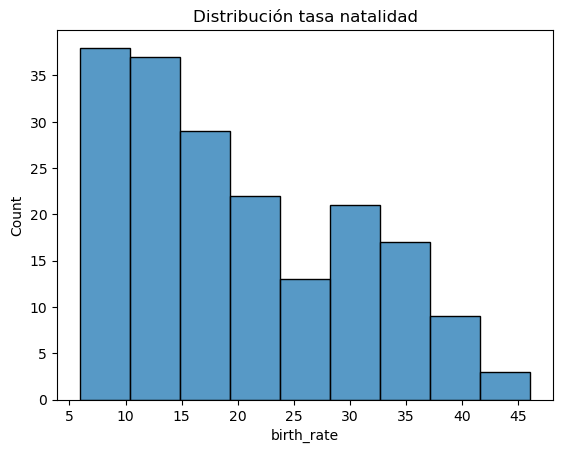

In [15]:
# 1.  ¿Cómo se distribuye la tasa de natalidad en el conjunto de datos? ¿Hay algún patrón evidente? VIS I
sns.histplot(x = "birth_rate", data = df)
plt.title('Distribución tasa natalidad');

- La distribución de la tasa de natalidad muestra una concentración de valores en el rango más bajo, con una larga cola hacia valores más altos.
- Esto puede significar que la mayoría de los países tienen una tasa de natalidad relativamente baja, pero aún existen algunos con tasas significativamente más altas.

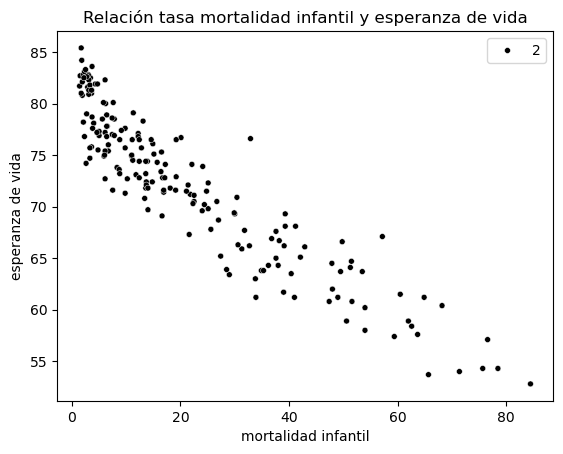

In [16]:
# 2.  ¿Existe una relación aparente entre la tasa de mortalidad infantil y la esperanza de vida? Proporciona una breve descripción de los patrones que observes. VIS I
sns.scatterplot(x = 'infant_mortality', 
                y = "life_expectancy", 
                size = 2, 
                color = "black",
                data = df )
plt.ylabel("esperanza de vida")
plt.xlabel("mortalidad infantil")
plt.title('Relación tasa mortalidad infantil y esperanza de vida');

- Se observa una relación negativa clara: a medida que aumenta la tasa de mortalidad infantil, la esperanza de vida disminuye.
- Esto indica que los países con alta mortalidad infantil tienden a tener condiciones de salud y desarrollo más precarias, lo que reduce la longevidad de su población.

In [7]:
# 3.  ¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente. II
df_pais_continente = df.groupby("continent")["country"].count().reset_index()
df_pais_continente.rename(columns = {"country": "%"}, inplace = True)
df_pais_continente["%"] = np.round(df_pais_continente["%"] * 100 / df_pais_continente["%"].sum(), 2)
df_pais_continente.sort_values(by = "%", ascending = False, inplace=True)
df_pais_continente

,continent,%
0,Africa,27.32
3,Europe,24.23
1,Asia,23.20
2,Central America,10.31
5,Oceania,7.22
6,South America,6.70
4,North America,1.03


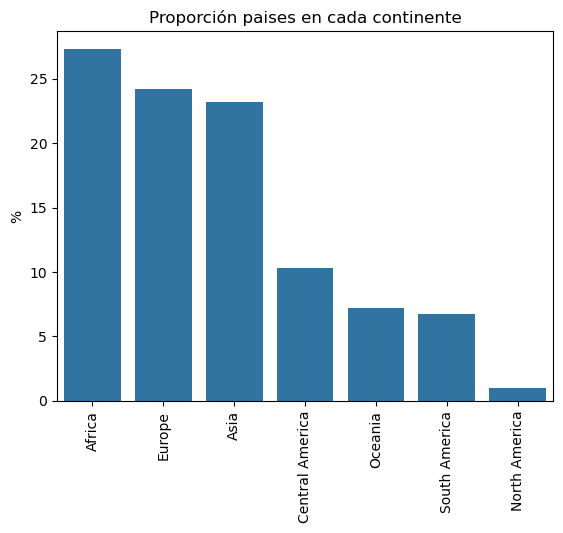

In [18]:
# grafica 1
sns.barplot(x = "continent", y = "%", data = df_pais_continente)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.title('Proporción paises en cada continente');

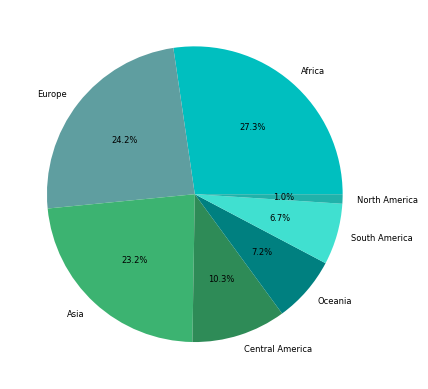

In [11]:
# grafica 2
colores = ["c", "cadetblue", "mediumseagreen", "seagreen", "teal", "turquoise", "lightseagreen"]

plt.pie(df_pais_continente["%"], 
        labels = df_pais_continente["continent"], 
        autopct=  '%1.1f%%', 
        textprops={'fontsize': 6}, 
        colors= colores);

C:\Users\Laura Romero\AppData\Local\Temp\ipykernel_15260\4071740295.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'life_expectancy',


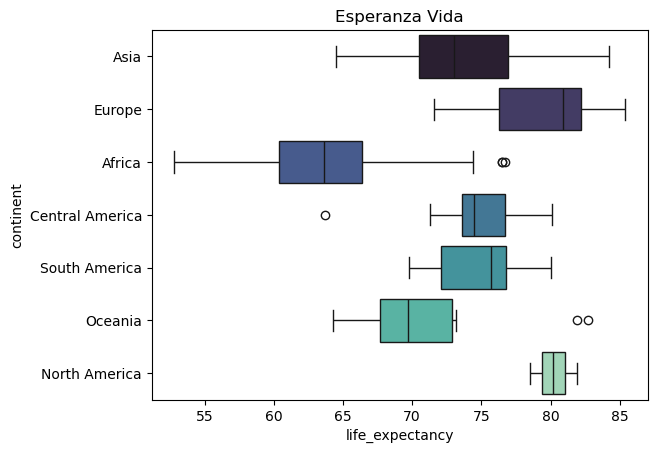

In [20]:
# 4.  ¿Cuál es la mediana de la esperanza de vida en Europa? Proporciona un rango intercuartil aproximado y verifica si existen valores atípicos. VIS I
sns.boxplot(x = 'life_expectancy',
            y = "continent",
            palette = "mako",  
            data = df)
plt.title('Esperanza Vida');

- Los valores de la esperanza de vida varían considerablemente según el continente.
- Se pueden observar diferencias marcadas en la mediana de la esperanza de vida entre continentes.
- También es importante ver qye hay valores atípicos en algunas regiones, lo que indicaría países con condiciones de salud y desarrollo significativamente diferentes al resto del continente.

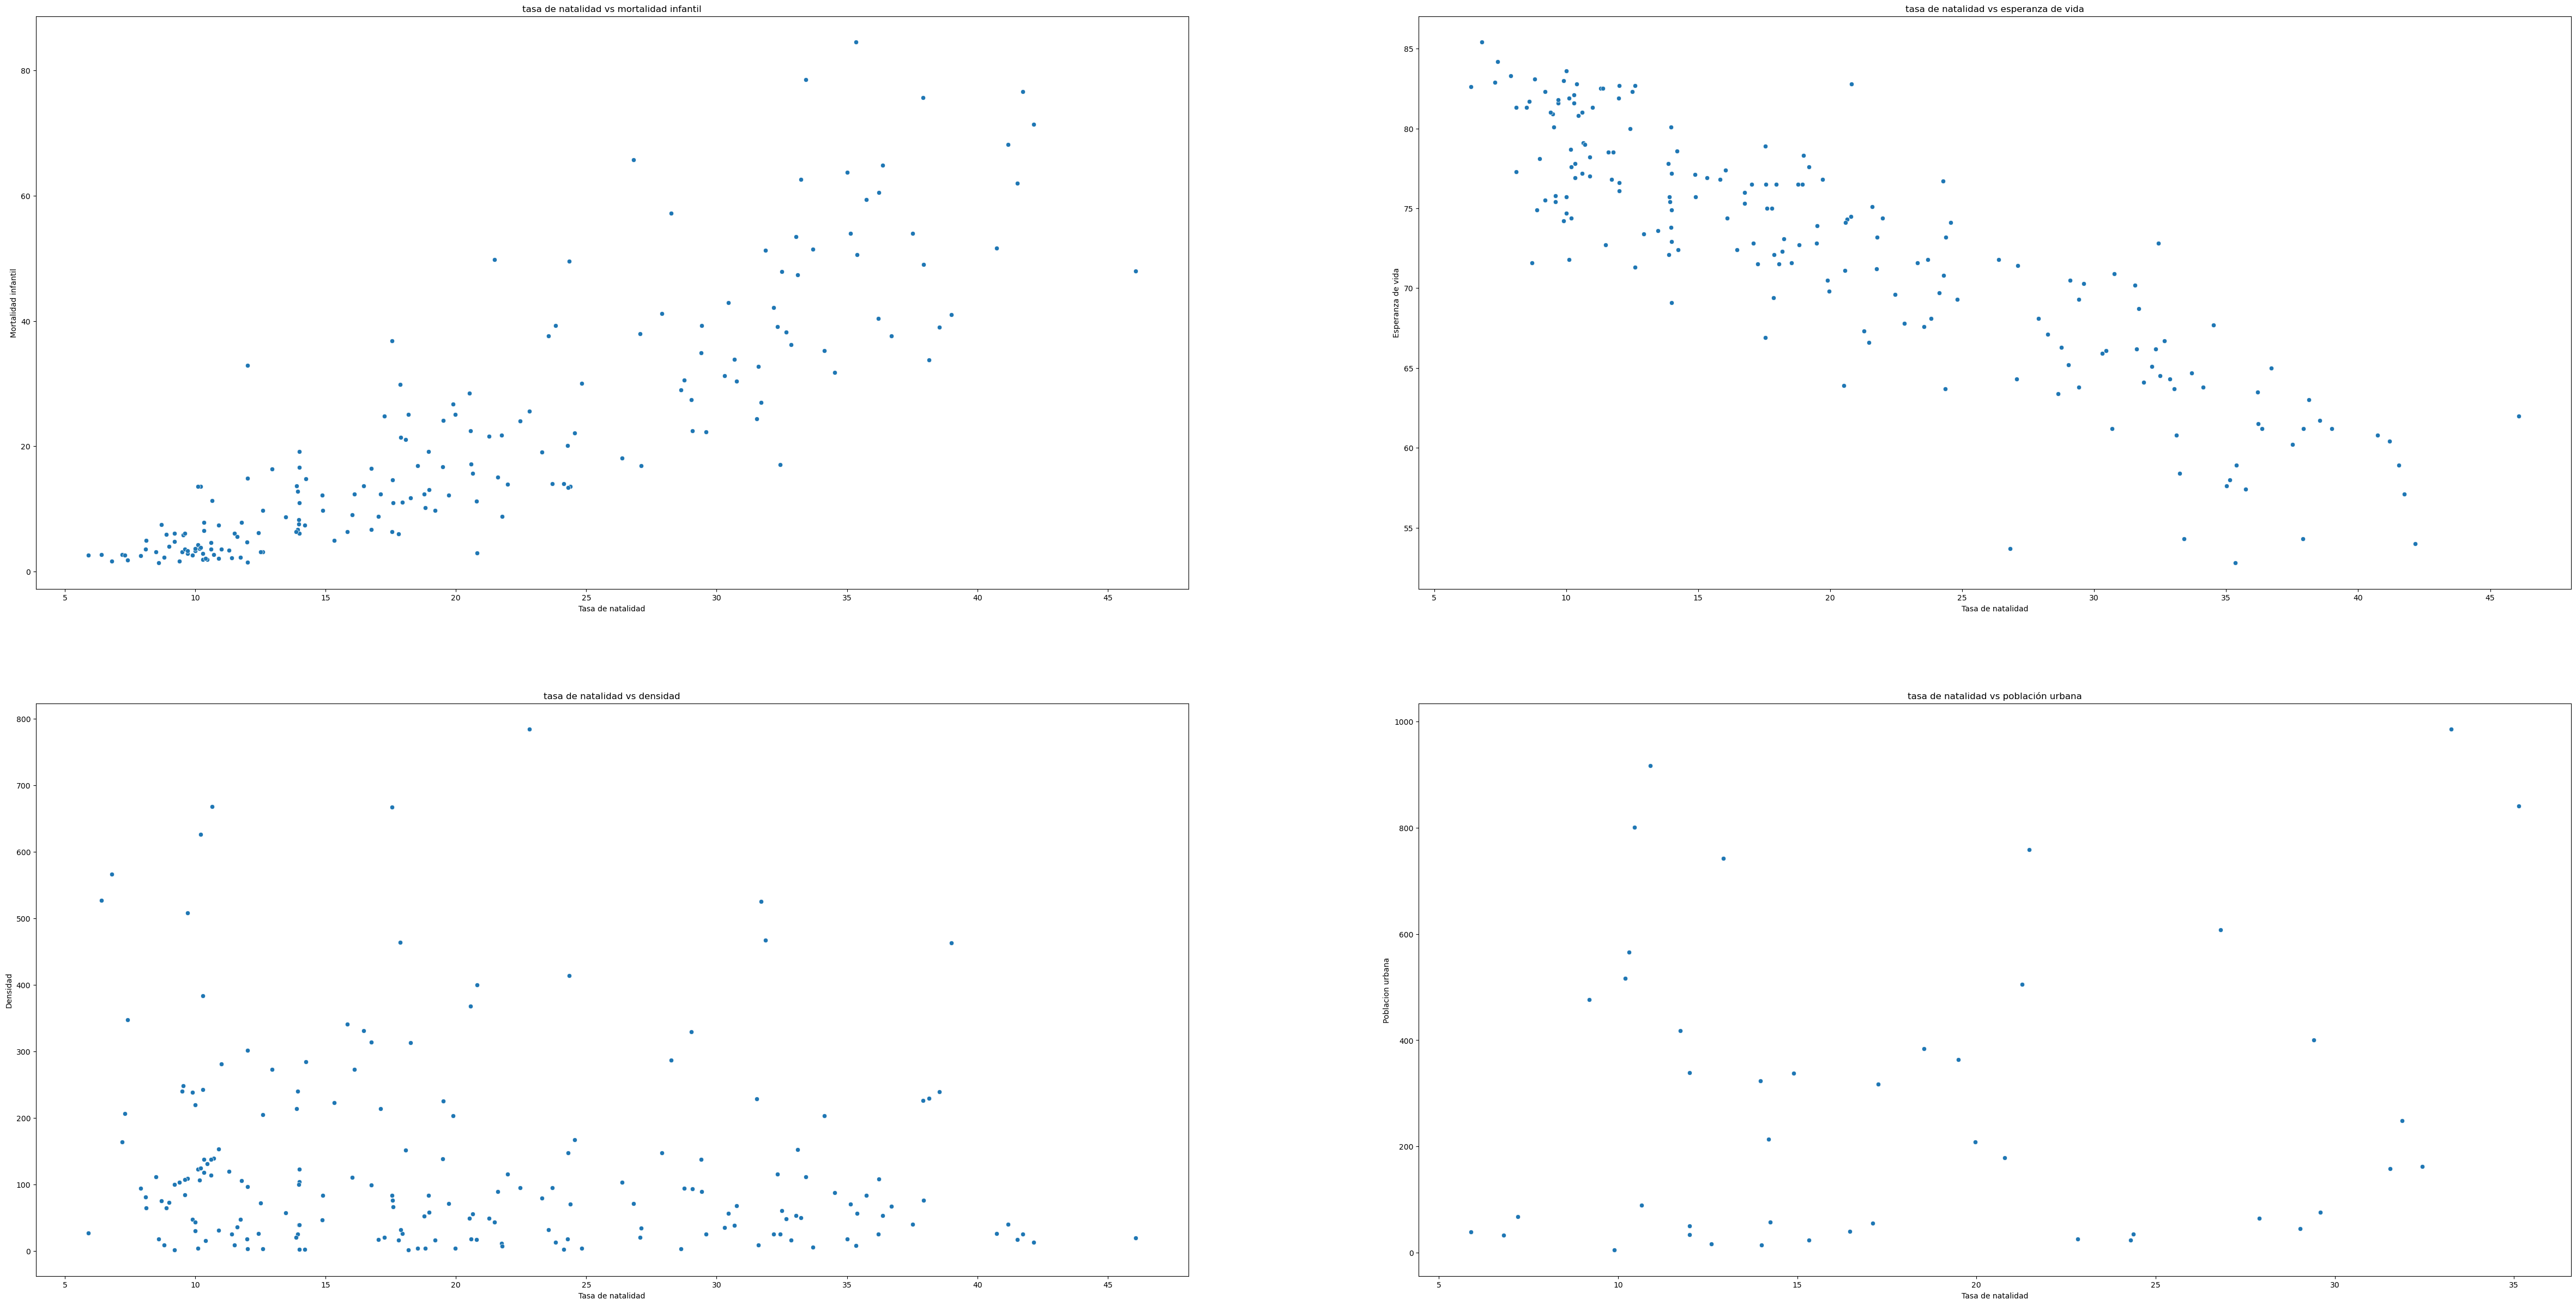

In [12]:
# 5.  ¿Existen relaciones visibles entre la tasa de natalidad y las siguientes variables: tasa de mortalidad infantil, tasa de impuestos total, densidad de población y tasa de alfabetización? VIS I
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (60, 30))

sns.scatterplot(x = "birth_rate", y = 'infant_mortality', data = df, ax = axes[0][0])
sns.scatterplot(x = "birth_rate", y = 'life_expectancy', data = df, ax = axes[0][1])
sns.scatterplot(x = "birth_rate", y = 'density', data = df, ax = axes[1][0])
sns.scatterplot(x = "birth_rate", y = 'urban_population', data = df, ax = axes[1][1])

# ponemos titulos a las gráficas
axes[0][0].set_title("tasa de natalidad vs mortalidad infantil")
axes[0][1].set_title("tasa de natalidad vs esperanza de vida")
axes[1][0].set_title("tasa de natalidad vs densidad")
axes[1][1].set_title("tasa de natalidad vs población urbana")

# cambiamos nombres de los ejes
axes[0][0].set_xlabel("Tasa de natalidad")
axes[0][1].set_xlabel("Tasa de natalidad")
axes[1][0].set_xlabel("Tasa de natalidad")
axes[1][1].set_xlabel("Tasa de natalidad")

axes[0][0].set_ylabel("Mortalidad infantil")
axes[0][1].set_ylabel("Esperanza de vida")
axes[1][0].set_ylabel("Densidad")
axes[1][1].set_ylabel("Poblacion urbana");

- Tasa de mortalidad infantil vs. Tasa de natalidad
  - Se observa una relación positiva: en países con alta mortalidad infantil, la tasa de natalidad también tiende a ser más alta.
  - Esto puede explicarse por factores socioeconómicos, donde en regiones con menor acceso a servicios de salud y alta mortalidad infantil, las familias tienden a tener más hijos.
- Tasa de impuestos total vs. Tasa de natalidad
  - No parece haber una relación clara entre la tasa de impuestos total y la tasa de natalidad.
  - Esto sugiere que otros factores, como la estabilidad económica y social, pueden tener una mayor influencia en la natalidad que los impuestos directamente.
- Densidad de población vs. Tasa de natalidad
  - No hay una correlación evidente entre la densidad de población y la tasa de natalidad.
  - Esto podría indicar que la cantidad de personas por kilómetro cuadrado no es un factor determinante para la cantidad de nacimientos en un país, ya que influyen otros elementos como cultura, acceso a servicios y políticas de planificación familiar.

In [13]:
# 6.  ¿Cuáles son los 10 países con la mayor área forestal? Vis II
df_top_10_forestal = df.sort_values(by = "forested_area", ascending = False)[["country", "forested_area"]].head()
df_top_10_forestal

,country,forested_area
167,Suriname,98.3
111,Federated States of Micronesia,91.9
61,Gabon,90.0
154,Seychelles,88.4
132,Palau,87.6


C:\Users\Laura Romero\AppData\Local\Temp\ipykernel_15260\1617491645.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "country", y = "forested_area", data = df_top_10_forestal, palette="viridis")


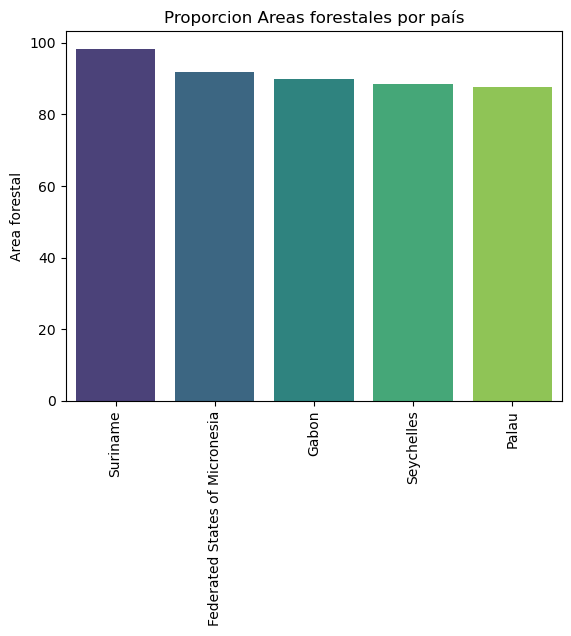

In [22]:
sns.barplot(x = "country", y = "forested_area", data = df_top_10_forestal, palette="viridis")
plt.xticks(rotation = 90)
plt.xlabel("")
plt.ylabel("Area forestal")
plt.title('Proporcion Areas forestales por país');